In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
import os

In [4]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [5]:
import glob
import cPickle as pickle
import sklearn.metrics

In [6]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [7]:
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']
all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Scale', '+ Y', '+ X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

all_results = {}

for experiment in experiments:

    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))
    print datasets
    results = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        results[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            y_s = []

            for s in stats_files:
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    y_s.append([stats['y_pred'], stats['y_test']])
                    

            results[i].append(y_s)
            
    print 'Loaded', experiment
            
    all_results[experiment] = results
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

['0', '1', '2']
Loaded C.Figure1.position_common_scale
['0', '1', '2', '3']
Loaded C.Figure1.position_non_aligned_scale
['0', '1', '2', '3']
Loaded C.Figure1.length
['0', '1', '2']
Loaded C.Figure1.direction
['0', '1', '2']
Loaded C.Figure1.angle
['0', '1', '2']
Loaded C.Figure1.area
['0', '1', '2']
Loaded C.Figure1.volume
['0', '1', '2', '3']
Loaded C.Figure1.curvature
['0', '1', '2']
Loaded C.Figure1.shading


In [8]:

# adjust values to match dictionaries/lists above
experiment = 0 # C.Figure1.position_common_scale
classifier = 1 # LeNet
dataset = 0 # Position Y


samples = all_results[experiments[experiment]][classifier][dataset]
no_samples = len(samples)
print 'No. Samples', no_samples

#
# this can be looped
#
current_sample_index = 0 # 0..no_samples-1
current_y_pred = samples[current_sample_index][0].ravel()
current_y_test = samples[current_sample_index][1].ravel()

print 'First 10 predictions', current_y_pred[0:10]
print 'First 10 groundtruth', current_y_test[0:10]
print 'MAE', sklearn.metrics.mean_absolute_error(current_y_pred, current_y_test)
print 'MLAE (from Cleveland)', np.log2(sklearn.metrics.mean_absolute_error(current_y_pred*100, current_y_test*100)+.125)

No. Samples 4
First 10 predictions [ 0.5033294   0.37584361  0.36549288  0.82599688  0.24338575  0.67129076
  0.79040539  0.80438983  0.75536072  0.47515643]
First 10 groundtruth [ 0.52542371  0.3898305   0.37288135  0.88135594  0.22033899  0.71186441
  0.84745765  0.86440676  0.81355929  0.49152541]
MAE 0.0325264
MLAE (from Cleveland) 1.75601496194


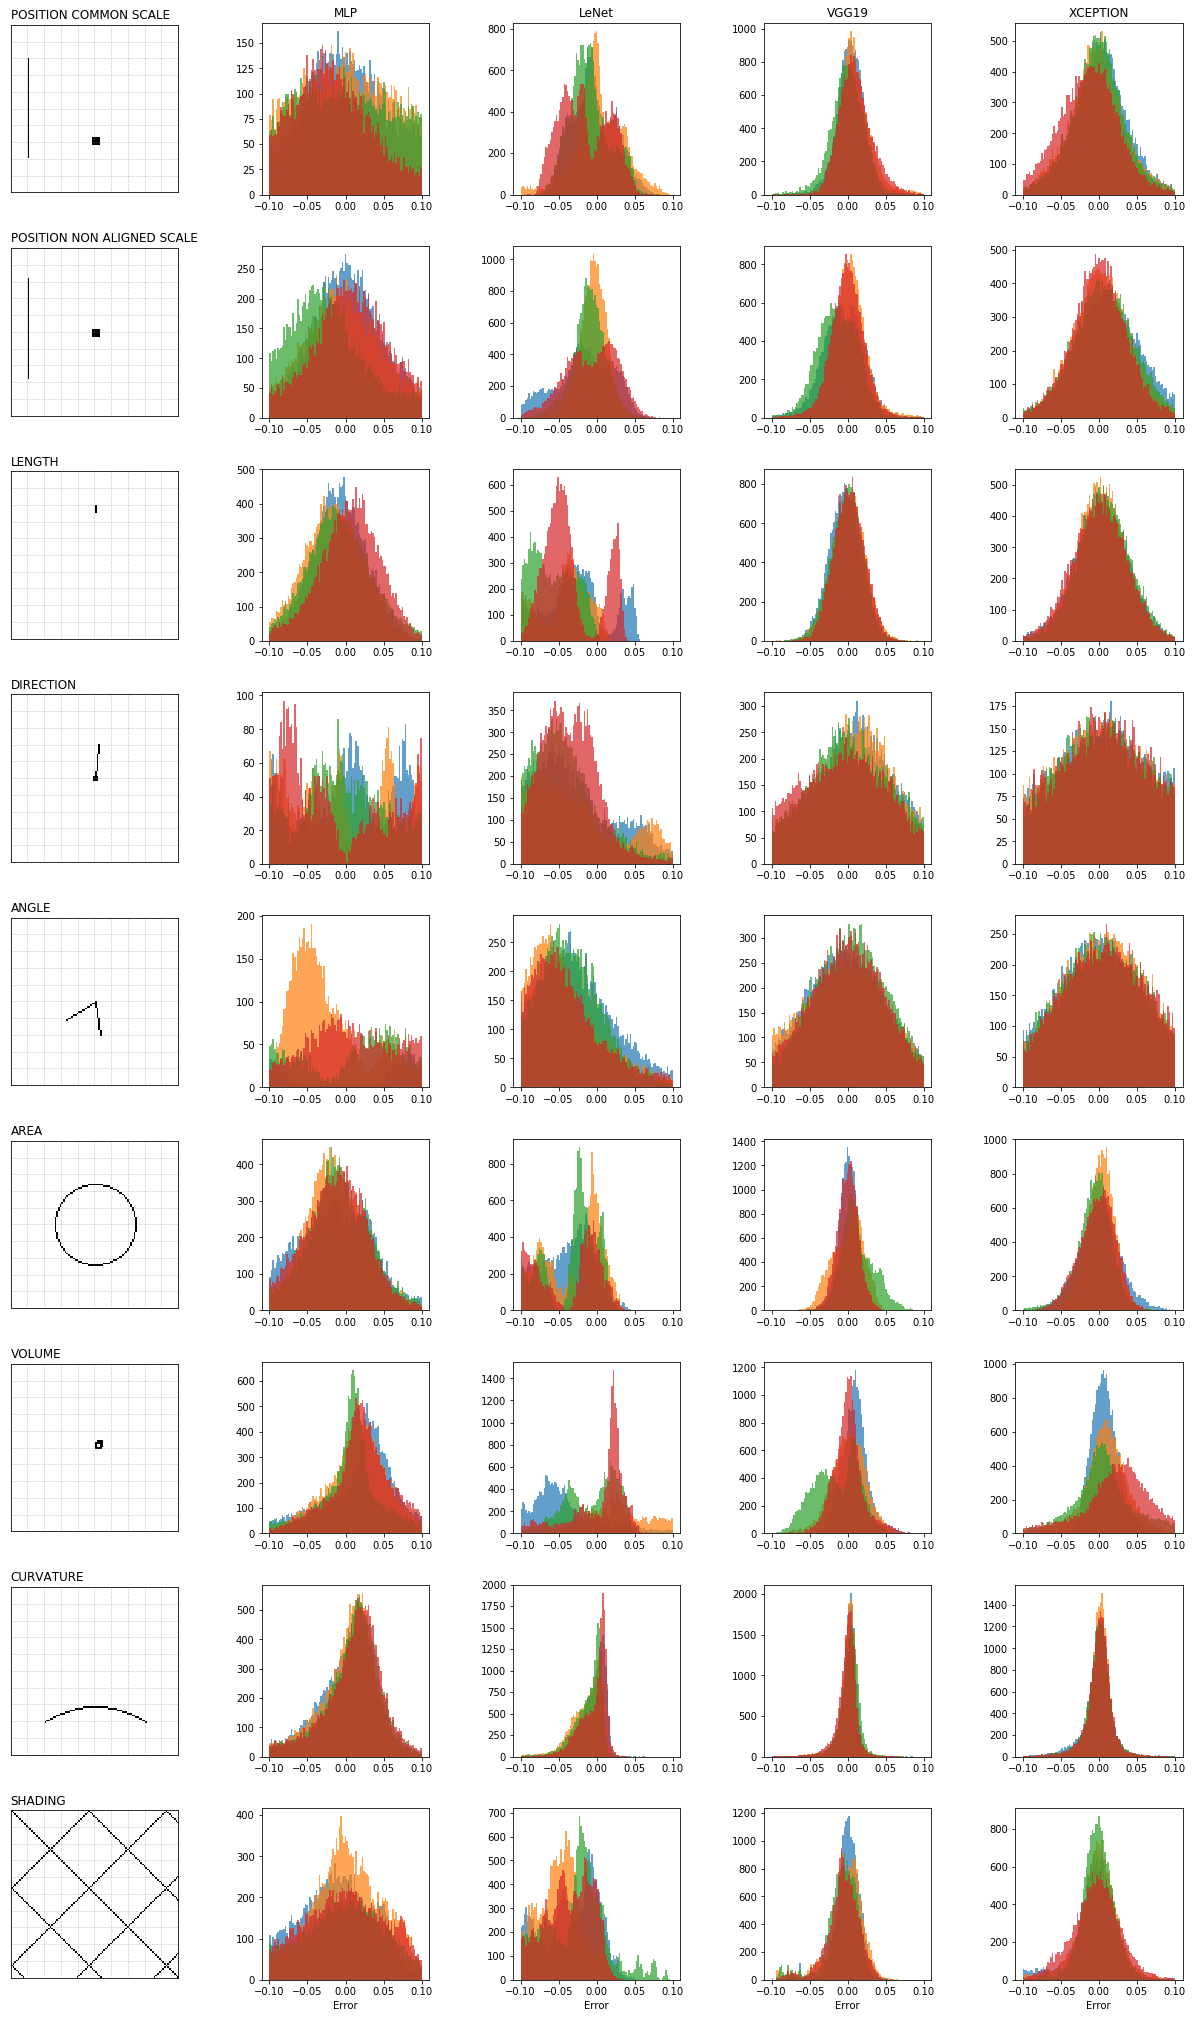

In [11]:
# loop through all samples for this experiment+classifier+dataset combination


from matplotlib import gridspec
fig = plt.figure(figsize=(21,len(experiments)*4), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 5, width_ratios=[1,1,1,1,1], wspace=.5, hspace=.3)
    
z = 0

for j,e in enumerate(experiments):
    
    for i,c in enumerate(['Image'] + classifiers):
    
        fig = plt.subplot(gs[z])
        z += 1
    
        if i == 0:
            

            plt.title(e.split('.')[-1].replace('_',' ').upper(), loc='left')
            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
#             plt.tight_layout()
            Util.imshow_nicely(eval(e)()[1], new_figure=False)

            continue
    
    
        samples = all_results[e][i-1][-1]
        no_samples = len(samples)


        
        
        for current_sample_index in range(no_samples):

            current_y_pred = samples[current_sample_index][0].ravel()
            current_y_test = samples[current_sample_index][1].ravel()

            errors = current_y_pred - current_y_test

            bins = np.linspace(-0.1,0.1,100)
        #     plt.figure()
#             plt.title(e+' '+c)
            plt.hist(errors, bins=bins, alpha=0.7, label='Run '+str(current_sample_index))
    
        if j == 0:
            plt.title(c)
    
        if j == 8:
            # last row
            plt.xlabel('Error')

            
plt.savefig('../PAPER/SUPPLEMENTAL/gfx/error_inspection.pdf', bbox_inches='tight', pad_inches=0)